# Project 3, Part 5 - Linear Regression Models

Kris Barbier

## Imports


In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
#Fix random seed for reproducibility
np.random.seed(321)

#Set global scikit-learn configuration 
from sklearn import set_config

#Display estimators as a diagram
set_config(display='diagram')

#Set max columns for dataframes
pd.set_option('display.max_columns',100)

## Load and Inspect Data

In [2]:
#Load in combined data set
FOLDER = 'Data/'
df = pd.read_csv(FOLDER+'combined_tmdb_data.csv.gz',lineterminator='\n')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,1.611,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.740,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.450,10.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",0.951,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,19.202,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.100,2298.0,PG
4,tt0118852,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",4.912,/nZGWnSuf1FIuzyEuMRZHHZWViAp.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.642,53.0,R


In [3]:
#Preview info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16898 entries, 0 to 16897
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                16898 non-null  object 
 1   adult                  16898 non-null  float64
 2   backdrop_path          9424 non-null   object 
 3   belongs_to_collection  1297 non-null   object 
 4   budget                 16898 non-null  float64
 5   genres                 16898 non-null  object 
 6   homepage               2763 non-null   object 
 7   id                     16898 non-null  float64
 8   original_language      16898 non-null  object 
 9   original_title         16898 non-null  object 
 10  overview               16513 non-null  object 
 11  popularity             16898 non-null  float64
 12  poster_path            14960 non-null  object 
 13  production_companies   16898 non-null  object 
 14  production_countries   16898 non-null  object 
 15  re

## Clean Data 

- Tasks:
    - Belongs to Collection: convert to boolean
    - Genres: get just the name and manually OHE
    - Cleaning Categories in Certification
    - Converting release date to year, month, and day.

In [4]:
#Drop unnecessary columns
drop_cols = ['backdrop_path','original_title','overview',
             'poster_path','status','tagline','id','homepage',
             'production_countries','video','production_companies','spoken_languages',
             'original_language']
df = df.drop(columns=drop_cols)
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
0,tt0113026,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",1.611,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN
1,tt0113092,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.740,2000-11-15,0.0,100.0,For the Cause,5.450,10.0,NaN
2,tt0116391,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.951,2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN
3,tt0118694,0.0,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",19.202,2000-09-29,14204632.0,99.0,In the Mood for Love,8.100,2298.0,PG
4,tt0118852,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",4.912,2000-09-02,0.0,99.0,Chinese Coffee,6.642,53.0,R


In [5]:
#Change values in belongs to collection column to true/false
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    15601
True      1297
Name: belongs_to_collection, dtype: int64

In [6]:
#Function to get list of genres from each movie
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [7]:
#Test function
get_genre_name(df.loc[3,'genres'])

['Drama', 'Romance']

In [8]:
#Use function to explode genres to new columns
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genres_list
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",1.611,2000-09-22,0.0,86.0,The Fantasticks,5.50,22.0,NaN,Comedy
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",1.611,2000-09-22,0.0,86.0,The Fantasticks,5.50,22.0,NaN,Music
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",1.611,2000-09-22,0.0,86.0,The Fantasticks,5.50,22.0,NaN,Romance
1,tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.740,2000-11-15,0.0,100.0,For the Cause,5.45,10.0,NaN,Science Fiction
2,tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.951,2000-04-14,0.0,152.0,Gang,4.00,1.0,NaN,Drama


In [9]:
#Save unique genres
unique_genres = df_explode['genres_list'].dropna().unique()
unique_genres

array(['Comedy', 'Music', 'Romance', 'Science Fiction', 'Drama', 'Action',
       'Crime', 'Adventure', 'Animation', 'Fantasy', 'Horror', 'Thriller',
       'History', 'Family', 'Mystery', 'Western', 'War', 'TV Movie',
       'Documentary'], dtype=object)

In [10]:
#Onehot encode genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex=False)    
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genres_list,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",1.611,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN,"[Comedy, Music, Romance]",True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.740,2000-11-15,0.0,100.0,For the Cause,5.450,10.0,NaN,[Science Fiction],False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.951,2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN,"[Drama, Action, Crime]",False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0118694,0.0,False,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",19.202,2000-09-29,14204632.0,99.0,In the Mood for Love,8.100,2298.0,PG,"[Drama, Romance]",False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,tt0118852,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}]",4.912,2000-09-02,0.0,99.0,Chinese Coffee,6.642,53.0,R,[Drama],False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
#Drop genres and genres_list 
df = df.drop(columns = ['genres', 'genres_list'])
df.head()

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
0,tt0113026,0.0,False,10000000.0,1.611,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0113092,0.0,False,0.0,1.740,2000-11-15,0.0,100.0,For the Cause,5.450,10.0,NaN,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0116391,0.0,False,0.0,0.951,2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0118694,0.0,False,150000.0,19.202,2000-09-29,14204632.0,99.0,In the Mood for Love,8.100,2298.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,tt0118852,0.0,False,0.0,4.912,2000-09-02,0.0,99.0,Chinese Coffee,6.642,53.0,R,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
#Preview certification column values
df['certification'].value_counts(dropna = False)

NaN                                11575
R                                   2585
PG-13                               1260
NR                                   768
PG                                   524
G                                    135
NC-17                                 47
Unrated                                1
UR                                     1
Not Rated                              1
ScreamFest Horror Film Festival        1
Name: certification, dtype: int64

In [13]:
#Remove extra space
df['certification'] = df['certification'].str.strip()

In [14]:
#Clean up extra ratings
cert_dict = {'Unrated': 'NR',
            'UR': 'NR',
            'Not Rated': 'NR',
            'ScreamFest Horror Film Festival': 'NR'}

#Replace values
df['certification'] = df['certification'].replace(cert_dict)
df['certification'].value_counts(dropna = False)

NaN      11575
R         2585
PG-13     1260
NR         772
PG         524
G          135
NC-17       47
Name: certification, dtype: int64

In [15]:
#Split release date into 3 columns
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)
df.head()

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
0,tt0113026,0.0,False,10000000.0,1.611,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,22.0
1,tt0113092,0.0,False,0.0,1.740,2000-11-15,0.0,100.0,For the Cause,5.450,10.0,NaN,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,11.0,15.0
2,tt0116391,0.0,False,0.0,0.951,2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,4.0,14.0
3,tt0118694,0.0,False,150000.0,19.202,2000-09-29,14204632.0,99.0,In the Mood for Love,8.100,2298.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
4,tt0118852,0.0,False,0.0,4.912,2000-09-02,0.0,99.0,Chinese Coffee,6.642,53.0,R,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,2.0


In [16]:
#Drop original release date column
df = df.drop(columns = 'release_date')

In [17]:
#Preview final df
df.head()

,imdb_id,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
0,tt0113026,0.0,False,10000000.0,1.611,0.0,86.0,The Fantasticks,5.500,22.0,NaN,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,22.0
1,tt0113092,0.0,False,0.0,1.740,0.0,100.0,For the Cause,5.450,10.0,NaN,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,11.0,15.0
2,tt0116391,0.0,False,0.0,0.951,0.0,152.0,Gang,4.000,1.0,NaN,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,4.0,14.0
3,tt0118694,0.0,False,150000.0,19.202,14204632.0,99.0,In the Mood for Love,8.100,2298.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
4,tt0118852,0.0,False,0.0,4.912,0.0,99.0,Chinese Coffee,6.642,53.0,R,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,2.0


## Pre-processing for Machine Learning

In [18]:
#Define X and y
drop_for_model = ['title','imdb_id']

y = df['revenue'].copy()
X = df.drop(columns=['revenue',*drop_for_model]).copy()

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

,adult,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
14013,0.0,False,0.0,0.655,107.0,0.000,0.0,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2008.0,4.0,21.0
69,0.0,False,0.0,3.238,89.0,4.000,10.0,PG-13,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,3.0,24.0
11203,0.0,False,0.0,1.015,115.0,6.600,16.0,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2007.0,2.0,24.0
10388,0.0,False,12000000.0,10.577,97.0,6.666,567.0,R,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2007.0,5.0,1.0
6864,0.0,False,0.0,1.091,0.0,0.000,0.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2005.0,9.0,9.0


In [19]:
#Make cat selector and use it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['certification']

In [20]:
#Save manually OHE cols for later
bool_select = make_column_selector(dtype_include='bool')
already_ohe_cols = bool_select(X_train)
already_ohe_cols

['belongs_to_collection',
 'Genre_Comedy',
 'Genre_Music',
 'Genre_Romance',
 'Genre_Science Fiction',
 'Genre_Drama',
 'Genre_Action',
 'Genre_Crime',
 'Genre_Adventure',
 'Genre_Animation',
 'Genre_Fantasy',
 'Genre_Horror',
 'Genre_Thriller',
 'Genre_History',
 'Genre_Family',
 'Genre_Mystery',
 'Genre_Western',
 'Genre_War',
 'Genre_TV Movie',
 'Genre_Documentary']

In [21]:
#Make num selector and use it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['adult',
 'budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'year',
 'month',
 'day']

In [22]:
#Change OHE columns to numeric
X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)

In [23]:
#Make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse_output=False))

num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

preprocessor = make_column_transformer((cat_pipe,cat_cols),
                                        (num_pipe, num_cols),
                                       ('passthrough',already_ohe_cols))
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['certification']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['adult', 'budget', 'popularity', 'runtime',
                                  'vote_ave...
                                ('passthrough', 'passthrough',
                                 ['belongs_to_collection', 'Genre_Comedy',
                                  'Genre_Music', 'Genre_Romance',
                                  'Genre_Science Fiction', 'Genre_Drama',
                                  'Genre_Action', 'Genre_Crime',
                                  'Genre_Adventure', 'Genre_Animation',
                                  'Genre_Fantasy', 'Genre_Horror',
                                  'Genre_Thriller', 'Genre_History',
                                  'Genre_Family', 'Genre_Mystery',
                                  'Genre_Western', 'Genre_War',
                                  'Genre_TV Movie', 'Genre_Documentary'])])

In [24]:
#Fit the col transformer
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['certification']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['adult', 'budget', 'popularity', 'runtime',
                                  'vote_ave...
                                ('passthrough', 'passthrough',
                                 ['belongs_to_collection', 'Genre_Comedy',
                                  'Genre_Music', 'Genre_Romance',
                                  'Genre_Science Fiction', 'Genre_Drama',
                                  'Genre_Action', 'Genre_Crime',
                                  'Genre_Adventure', 'Genre_Animation',
                                  'Genre_Fantasy', 'Genre_Horror',
                                  'Genre_Thriller', 'Genre_History',
                                  'Genre_Family', 'Genre_Mystery',
                                  'Genre_Western', 'Genre_War',
                                  'Genre_TV Movie', 'Genre_Documentary'])])

In [25]:
#Finding the categorical pipeline in our col transformer.
preprocessor.named_transformers_['pipeline-1']

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [26]:
#Using list-slicing to find the encoder 
cat_features = preprocessor.named_transformers_['pipeline-1'][-1].get_feature_names_out(cat_cols)


#Create the empty list
final_features = [*cat_features,*num_cols,*already_ohe_cols]
print(len(final_features))

#Checking shape matches len final features
print(preprocessor.transform(X_train).shape)

36
(12673, 36)


In [27]:
#Make X_train_tf 
X_train_tf = pd.DataFrame(preprocessor.transform(X_train), 
                          columns=final_features, index=X_train.index)
X_train_tf.head()

,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
14013,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.655,107.0,0.000,0.0,2008.0,4.0,21.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.238,89.0,4.000,10.0,2000.0,3.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11203,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.015,115.0,6.600,16.0,2007.0,2.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10388,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12000000.0,10.577,97.0,6.666,567.0,2007.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6864,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.091,0.0,0.000,0.0,2005.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
#Make X_test_tf 
X_test_tf = pd.DataFrame(preprocessor.transform(X_test),
                         columns=final_features, index=X_test.index)
X_test_tf.head()

,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
4209,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600,0.0,0.000,0.0,2003.0,5.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9949,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.772,0.0,4.500,6.0,2006.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8338,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600,108.0,0.000,0.0,2006.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3536,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.991,77.0,6.752,117.0,2003.0,6.0,13.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16157,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.334,105.0,6.388,41.0,2009.0,9.0,23.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#Import statsmodels 
import statsmodels.api as sm

In [30]:
#Make final X_train_df and X_test_df with constants added
X_train_df = sm.add_constant(X_train_tf, prepend=True)
X_test_df = sm.add_constant(X_test_tf, prepend=True)
display(X_train_df.head(2),X_test_df.head(2))

,const,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
14013,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.655,107.0,0.0,0.0,2008.0,4.0,21.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.238,89.0,4.0,10.0,2000.0,3.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,const,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
4209,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600,0.0,0.0,0.0,2003.0,5.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9949,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.772,0.0,4.5,6.0,2006.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Modeling

### Model 1:

- The first linear regression model finished with an R2 on the testing data of 0.739.

In [31]:
#Instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

#Fit the model and view the summary
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1591.
Date:                Fri, 15 Sep 2023   Prob (F-statistic):               0.00
Time:                        08:03:28   Log-Likelihood:            -2.3382e+05
No. Observations:               12673   AIC:                         4.677e+05
Df Residuals:                   12637   BIC:                         4.680e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.687e+07   1.32e+08     -0.203      0.839   -2.86e+08    2.32e+08
certification_G       -8.157e+05    1.9e+07     -0.043      0.966   -3.81e+07    3.65e+07
certification_MISSING -2.043e+06   1.89e+07     -0.108      0.914   -3.91e+07     3.5e+07
certification_NC-17   -4.251e+06   1.93e+07     -0.220      0.826   -4.21e+07    3.36e+07
certification_NR      -3.739e+06    1.9e+07     -0.197      0.844   -4.09e+07    3.35e+07
certification_PG      -2.093e+06    1.9e+07     -0.110      0.912   -3.93e+07    3.51e+07
certification_PG-13   -3.761e+06   1.89e+07     -0.199      0.842   -4.08e+07    3.33e+07
certification_R       -1.016e+07   1.89e+07     -0.538      0.591   -4.72e+07    2.69e+07
adult                  5.824e+05   5.86e+06      0.099      0.921   -1.09e+07    1.21e+07
budget                    1.2869      0.019     69.171      0.000       1.250       1.323
popularity             2.305e+04   5.02e+04      0.459      0.646   -7.54e+04    1.22e+05
runtime                6045.3664   8394.526      0.720      0.471   -1.04e+04    2.25e+04
vote_average          -5.467e+05   1.04e+05     -5.245      0.000   -7.51e+05   -3.42e+05
vote_count             2.577e+04    286.629     89.911      0.000    2.52e+04    2.63e+04
year                   1.538e+04   7.54e+04      0.204      0.838   -1.32e+05    1.63e+05
month                 -1.416e+05   6.29e+04     -2.249      0.025   -2.65e+05   -1.82e+04
day                    2.104e+04   2.44e+04      0.863      0.388   -2.68e+04    6.88e+04
belongs_to_collection  1.175e+07   9.04e+05     12.988      0.000    9.97e+06    1.35e+07
Genre_Comedy          -1.919e+05   5.41e+05     -0.355      0.723   -1.25e+06    8.69e+05
Genre_Music            1.943e+05   1.62e+06      0.120      0.905   -2.99e+06    3.37e+06
Genre_Romance          1.032e+06   6.41e+05      1.609      0.108   -2.25e+05    2.29e+06
Genre_Science Fiction -7.991e+06   1.07e+06     -7.462      0.000   -1.01e+07   -5.89e+06
Genre_Drama           -5.425e+05   5.23e+05     -1.037      0.300   -1.57e+06    4.83e+05
Genre_Action          -5.577e+05   7.33e+05     -0.760      0.447      -2e+06     8.8e+05
Genre_Crime           -5.154e+06    8.5e+05     -6.063      0.000   -6.82e+06   -3.49e+06
Genre_Adventure        4.702e+06   1.08e+06      4.347      0.000    2.58e+06    6.82e+06
Genre_Animation       -1.003e+06   1.44e+06     -0.695      0.487   -3.83e+06    1.83e+06
Genre_Fantasy         -6.495e+05   1.14e+06     -0.568      0.570   -2.89e+06    1.59e+06
Genre_Horror           -1.46e+05   7.32e+05     -0.200      0.842   -1.58e+06    1.29e+06
Genre_Thriller        -8.258e+05   6.61e+05     -1.249      0.212   -2.12e+06     4.7e+05
Genre_History         -4.603e+06   1.66e+06     -2.778      0.005   -7.85e+06   -1.36e+06
Genre_Family          -

In [32]:
#Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

#Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.815
Testing R^2: 0.739


### Checking Assumptions

In [61]:
# Function to plot qq plot and residual plot
def evaluate_ols(result,X_train_df, y_train, show_summary=True):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    try:
        display(result.summary())
    except:
        pass
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()

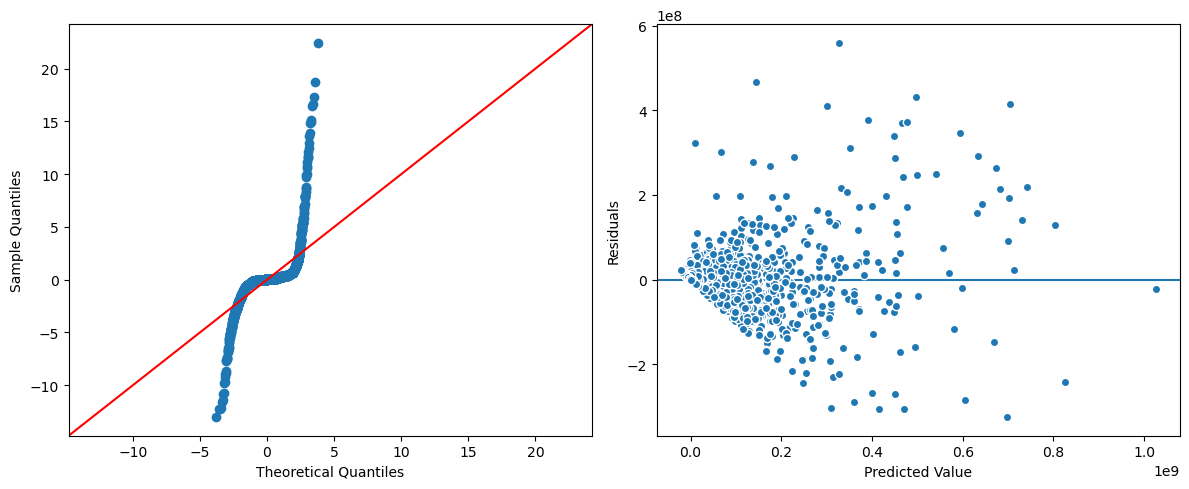

In [34]:
#Test function
evaluate_ols(result,X_train_df, y_train)

### Model 2: Extra Cleaning

- The second model which had a little more cleaning, has a test R2 of 0.711.

In [35]:
#Reload the data
df = pd.read_csv(FOLDER+'combined_tmdb_data.csv.gz',lineterminator='\n')
df.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,1.611,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.740,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.45,10.0,NaN


In [36]:
#Drop unnecessary columns
drop_cols = ['backdrop_path','original_title','overview',
             'poster_path', 'tagline','id','homepage',
             'production_countries','video', 'spoken_languages',
             'original_language', 'status', 'production_companies']
df = df.drop(columns=drop_cols)
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
0,tt0113026,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",1.611,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN
1,tt0113092,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.740,2000-11-15,0.0,100.0,For the Cause,5.450,10.0,NaN
2,tt0116391,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.951,2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN
3,tt0118694,0.0,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",19.202,2000-09-29,14204632.0,99.0,In the Mood for Love,8.100,2298.0,PG
4,tt0118852,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",4.912,2000-09-02,0.0,99.0,Chinese Coffee,6.642,53.0,R


In [37]:
#Change values in belongs to collection column to true/false
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    15601
True      1297
Name: belongs_to_collection, dtype: int64

In [38]:
#Function to get list of genres from each movie
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [39]:
#Test function
get_genre_name(df.loc[3,'genres'])

['Drama', 'Romance']

In [40]:
#Use function to explode genres to new columns
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genres_list
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",1.611,2000-09-22,0.0,86.0,The Fantasticks,5.50,22.0,NaN,Comedy
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",1.611,2000-09-22,0.0,86.0,The Fantasticks,5.50,22.0,NaN,Music
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",1.611,2000-09-22,0.0,86.0,The Fantasticks,5.50,22.0,NaN,Romance
1,tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.740,2000-11-15,0.0,100.0,For the Cause,5.45,10.0,NaN,Science Fiction
2,tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.951,2000-04-14,0.0,152.0,Gang,4.00,1.0,NaN,Drama


In [41]:
#Save unique genres
unique_genres = df_explode['genres_list'].dropna().unique()
unique_genres

array(['Comedy', 'Music', 'Romance', 'Science Fiction', 'Drama', 'Action',
       'Crime', 'Adventure', 'Animation', 'Fantasy', 'Horror', 'Thriller',
       'History', 'Family', 'Mystery', 'Western', 'War', 'TV Movie',
       'Documentary'], dtype=object)

In [42]:
#Onehot encode genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex=False)    
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genres_list,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",1.611,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN,"[Comedy, Music, Romance]",True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.740,2000-11-15,0.0,100.0,For the Cause,5.450,10.0,NaN,[Science Fiction],False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.951,2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN,"[Drama, Action, Crime]",False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0118694,0.0,False,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",19.202,2000-09-29,14204632.0,99.0,In the Mood for Love,8.100,2298.0,PG,"[Drama, Romance]",False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,tt0118852,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}]",4.912,2000-09-02,0.0,99.0,Chinese Coffee,6.642,53.0,R,[Drama],False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [43]:
#Drop genres and genres_list 
df = df.drop(columns = ['genres', 'genres_list'])
df.head()

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
0,tt0113026,0.0,False,10000000.0,1.611,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0113092,0.0,False,0.0,1.740,2000-11-15,0.0,100.0,For the Cause,5.450,10.0,NaN,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0116391,0.0,False,0.0,0.951,2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0118694,0.0,False,150000.0,19.202,2000-09-29,14204632.0,99.0,In the Mood for Love,8.100,2298.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,tt0118852,0.0,False,0.0,4.912,2000-09-02,0.0,99.0,Chinese Coffee,6.642,53.0,R,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
#Preview certification column values
df['certification'].value_counts(dropna = False)

NaN                                11575
R                                   2585
PG-13                               1260
NR                                   768
PG                                   524
G                                    135
NC-17                                 47
Unrated                                1
UR                                     1
Not Rated                              1
ScreamFest Horror Film Festival        1
Name: certification, dtype: int64

In [45]:
#Remove extra space
df['certification'] = df['certification'].str.strip()

In [46]:
#Clean up extra ratings
cert_dict = {'Unrated': 'NR',
            'UR': 'NR',
            'Not Rated': 'NR',
            'ScreamFest Horror Film Festival': 'NR'}

#Replace values
df['certification'] = df['certification'].replace(cert_dict)
df['certification'].value_counts(dropna = False)

NaN      11575
R         2585
PG-13     1260
NR         772
PG         524
G          135
NC-17       47
Name: certification, dtype: int64

In [47]:
#Split release date into 3 columns
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)
df.head()

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
0,tt0113026,0.0,False,10000000.0,1.611,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,22.0
1,tt0113092,0.0,False,0.0,1.740,2000-11-15,0.0,100.0,For the Cause,5.450,10.0,NaN,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,11.0,15.0
2,tt0116391,0.0,False,0.0,0.951,2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,4.0,14.0
3,tt0118694,0.0,False,150000.0,19.202,2000-09-29,14204632.0,99.0,In the Mood for Love,8.100,2298.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
4,tt0118852,0.0,False,0.0,4.912,2000-09-02,0.0,99.0,Chinese Coffee,6.642,53.0,R,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,2.0


In [48]:
#Drop original release date column
df = df.drop(columns = 'release_date')

In [49]:
#Filter out movies that don't have financial data
df = df.loc[(df['budget'] >0 ) & (df['revenue']>0)]
df

,imdb_id,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
3,tt0118694,0.0,False,150000.0,19.202,14204632.0,99.0,In the Mood for Love,8.100,2298.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
10,tt0120467,0.0,False,120000.0,2.709,14904.0,87.0,Vulgar,5.500,44.0,R,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,2002.0,4.0,26.0
12,tt0120630,0.0,True,45000000.0,34.762,224834564.0,84.0,Chicken Run,6.800,4460.0,G,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,2000.0,6.0,23.0
15,tt0120753,0.0,False,8000000.0,9.602,105983.0,122.0,The Million Dollar Hotel,5.895,287.0,R,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2000.0,2.0,9.0
16,tt0120755,0.0,True,125000000.0,42.596,546388105.0,123.0,Mission: Impossible II,6.100,6065.0,PG-13,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,2000.0,5.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16598,tt1537772,0.0,False,2000000.0,0.763,1988431.0,98.0,Wings Of The Night,4.000,11.0,NaN,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,2009.0,12.0,11.0
16618,tt1542960,0.0,False,300000.0,0.954,200000.0,122.0,The Figurine: Araromire,4.000,12.0,NaN,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,2009.0,10.0,2.0
16659,tt1560950,0.0,True,600.0,2.920,3.0,81.0,D@bbe 2,2.083,18.0,NaN,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,2009.0,12.0,24.0
16666,tt1565058,0.0,True,125000.0,5.062,3470000.0,88.0,A Blood Pledge,5.372,47.0,NaN,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,2009.0,6.0,18.0


In [50]:
#Drop title and imdb_id
df = df.drop(columns = ['title', 'imdb_id'])
df.head()

,adult,belongs_to_collection,budget,popularity,revenue,runtime,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
3,0.0,False,150000.0,19.202,14204632.0,99.0,8.100,2298.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
10,0.0,False,120000.0,2.709,14904.0,87.0,5.500,44.0,R,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,2002.0,4.0,26.0
12,0.0,True,45000000.0,34.762,224834564.0,84.0,6.800,4460.0,G,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,2000.0,6.0,23.0
15,0.0,False,8000000.0,9.602,105983.0,122.0,5.895,287.0,R,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2000.0,2.0,9.0
16,0.0,True,125000000.0,42.596,546388105.0,123.0,6.100,6065.0,PG-13,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,2000.0,5.0,24.0


In [51]:
#Concatenating training data into plot_df
plot_df = pd.concat([X_train_df,y_train],axis=1)
plot_df

,const,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,revenue
14013,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.655,107.0,0.000,0.0,2008.0,4.0,21.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.238,89.0,4.000,10.0,2000.0,3.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11203,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.015,115.0,6.600,16.0,2007.0,2.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10388,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12000000.0,10.577,97.0,6.666,567.0,2007.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5254986.0
6864,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.091,0.0,0.000,0.0,2005.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11976,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.165,110.0,5.600,17.0,2007.0,10.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5929,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.400,86.0,5.542,12.0,2005.0,7.0,13.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11039,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.638,86.0,6.125,48.0,2007.0,6.0,25.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83398.0
4220,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.874,105.0,6.800,98.0,2003.0,10.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
## save plot_cols list to show (dropping genre from plot_df from pair_plot)
genre_cols = [c for c in df.columns if c.startswith('Genre')]
plot_cols = plot_df.drop(columns=['revenue',*genre_cols]).columns
len(plot_cols)

18

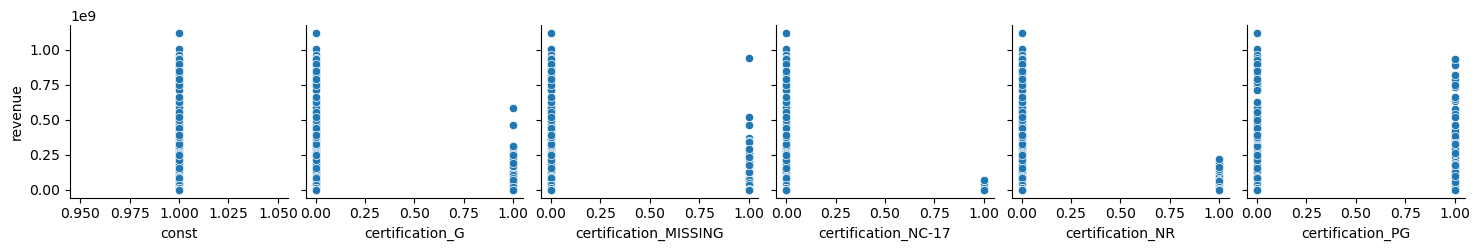

In [55]:
#Pairplot of first 6 cols
sns.pairplot(data=plot_df, y_vars='revenue',x_vars=plot_cols[:6]);

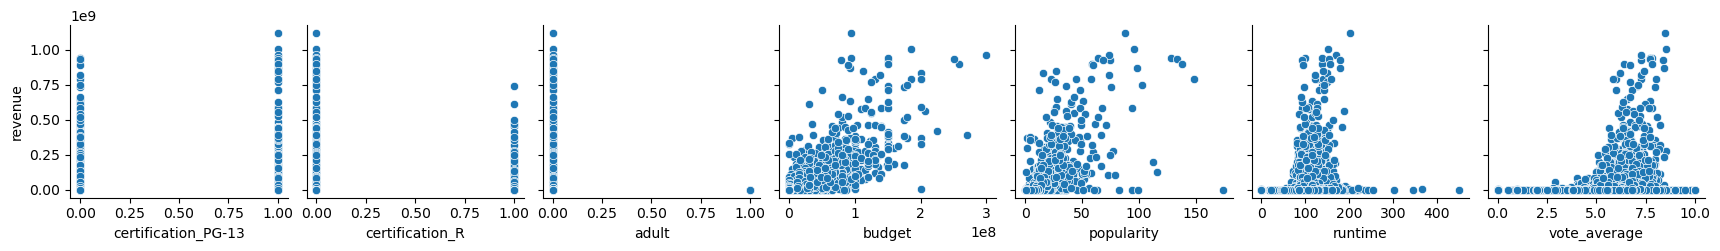

In [57]:
#Pairplot of next 6 cols
sns.pairplot(data=plot_df, y_vars='revenue',x_vars=plot_cols[6:13]);

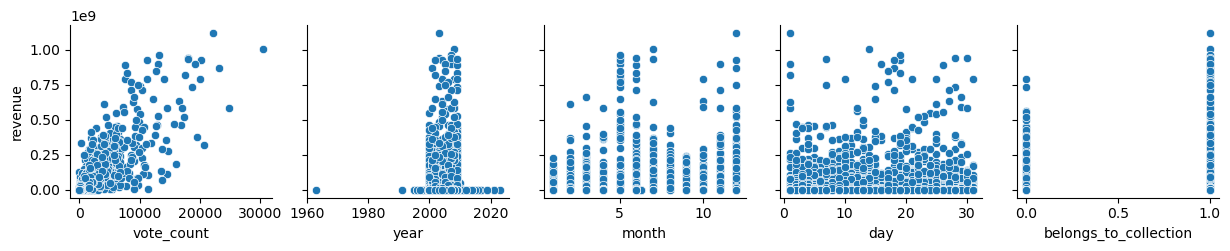

In [58]:
#Pairplot of next 6 cols
sns.pairplot(data=plot_df, y_vars='revenue',x_vars=plot_cols[13:]);

In [59]:
#Remove movies prior to 2000
df = df.loc[ df['year']>=2000]
df

,adult,belongs_to_collection,budget,popularity,revenue,runtime,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
3,0.0,False,150000.0,19.202,14204632.0,99.0,8.100,2298.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
10,0.0,False,120000.0,2.709,14904.0,87.0,5.500,44.0,R,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,2002.0,4.0,26.0
12,0.0,True,45000000.0,34.762,224834564.0,84.0,6.800,4460.0,G,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,2000.0,6.0,23.0
15,0.0,False,8000000.0,9.602,105983.0,122.0,5.895,287.0,R,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2000.0,2.0,9.0
16,0.0,True,125000000.0,42.596,546388105.0,123.0,6.100,6065.0,PG-13,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,2000.0,5.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16598,0.0,False,2000000.0,0.763,1988431.0,98.0,4.000,11.0,NaN,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,2009.0,12.0,11.0
16618,0.0,False,300000.0,0.954,200000.0,122.0,4.000,12.0,NaN,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,2009.0,10.0,2.0
16659,0.0,True,600.0,2.920,3.0,81.0,2.083,18.0,NaN,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,2009.0,12.0,24.0
16666,0.0,True,125000.0,5.062,3470000.0,88.0,5.372,47.0,NaN,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,2009.0,6.0,18.0


In [63]:
#Function for train/test split
def get_train_test_split(df_, y_col='revenue',drop_cols=[]):
    
    ## Make copy of input df
    df = df_.copy()
    
    ## filter columns in drop cols (if exist)
    final_drop_cols = []
    [df.drop(columns=c,inplace=True) for c in df.columns if c in drop_cols]
    
    
    ## Make x and y variables
    y = df[y_col].copy()
    X = df.drop(columns=[y_col]).copy()

    X_train, X_test, y_train, y_test = train_test_split(X,y)#, random_state=321)
    

    
    ## make cat selector and using it to save list of column names
    cat_select = make_column_selector(dtype_include='object')
    cat_cols = cat_select(X_train)


    ## make num selector and using it to save list of column names
    num_select = make_column_selector(dtype_include='number')
    num_cols = num_select(X_train)


    ## select manually OHE cols for later
    bool_select = make_column_selector(dtype_include='bool')
    already_ohe_cols = bool_select(X_train)

    ## convert manual ohe to int
    X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
    X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)

    ## make pipelines
    cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                           fill_value='MISSING'),
                             OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                            )

    preprocessor = make_column_transformer((num_pipe, num_cols),
                                           (cat_pipe,cat_cols),remainder='passthrough')
    
    

    ## fit the col transformer
    preprocessor.fit(X_train)

    ## Finding the categorical pipeline in our col transformer.
    preprocessor.named_transformers_['pipeline-2']

    ## B) Using list-slicing to find the encoder 
    cat_features = preprocessor.named_transformers_['pipeline-2'][-1].get_feature_names_out(cat_cols)


    ## Create the empty list
    final_features = [*cat_features,*num_cols,*already_ohe_cols]

    ## Make df verisons of x data
    X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                              columns=final_features, index=X_train.index)


    X_test_tf = pd.DataFrame( preprocessor.transform(X_test),
                             columns=final_features, index=X_test.index)


    ### Adding a Constant for Statsmodels
    ## Make final X_train_df and X_test_df with constants added
    X_train_df = sm.add_constant(X_train_tf, prepend=False, has_constant='add')
    X_test_df = sm.add_constant(X_test_tf, prepend=False, has_constant='add')
    return X_train_df, y_train, X_test_df, y_test

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     186.4
Date:                Fri, 15 Sep 2023   Prob (F-statistic):               0.00
Time:                        08:09:36   Log-Likelihood:                -34227.
No. Observations:                1752   AIC:                         6.852e+04
Df Residuals:                    1717   BIC:                         6.871e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
certification_G         215.6491    140.276      1.537      0.124     -59.480     490.778
certification_MISSING     1.4476      0.071     20.496      0.000       1.309       1.586
certification_NC-17    7.551e+05   2.13e+05      3.547      0.000    3.37e+05    1.17e+06
certification_NR       2.757e+05   1.07e+05      2.566      0.010    6.49e+04    4.86e+05
certification_PG      -8.157e+06   2.17e+06     -3.756      0.000   -1.24e+07    -3.9e+06
certification_PG-13    2.698e+04   1053.133     25.621      0.000    2.49e+04     2.9e+04
certification_R          9.7e+05   6.33e+05      1.533      0.126   -2.71e+05    2.21e+06
adult                  -2.67e+05   5.26e+05     -0.507      0.612    -1.3e+06    7.65e+05
budget                 1.829e+05   2.07e+05      0.884      0.377   -2.23e+05    5.89e+05
popularity            -2.506e+08   1.59e+08     -1.576      0.115   -5.62e+08    6.12e+07
runtime               -2.369e+08   1.59e+08     -1.490      0.136   -5.49e+08    7.49e+07
vote_average          -2.307e+08   1.62e+08     -1.424      0.155   -5.48e+08     8.7e+07
vote_count            -2.489e+08   1.59e+08     -1.563      0.118   -5.61e+08    6.35e+07
year                  -2.466e+08   1.59e+08     -1.552      0.121   -5.58e+08    6.51e+07
month                 -2.396e+08   1.59e+08     -1.510      0.131   -5.51e+08    7.16e+07
day                    -2.54e+08   1.59e+08     -1.600      0.110   -5.65e+08    5.74e+07
belongs_to_collection  3.415e+07   4.74e+06      7.203      0.000    2.49e+07    4.34e+07
Genre_Comedy           4.011e+06   4.78e+06      0.839      0.401   -5.36e+06    1.34e+07
Genre_Music            7.911e+06    1.2e+07      0.658      0.511   -1.57e+07    3.15e+07
Genre_Romance          5.316e+06   4.99e+06      1.064      0.287   -4.48e+06    1.51e+07
Genre_Science Fiction -2.812e+07    6.8e+06     -4.136      0.000   -4.15e+07   -1.48e+07
Genre_Drama           -1.579e+05   4.69e+06     -0.034      0.973   -9.35e+06    9.04e+06
Genre_Action           -8.56e+06   5.16e+06     -1.659      0.097   -1.87e+07    1.56e+06
Genre_Crime           -1.077e+07   5.52e+06     -1.953      0.051   -2.16e+07    4.79e+04
Genre_Adventure        1.223e+07   5.79e+06      2.110      0.035    8.61e+05    2.36e+07
Genre_Animation        4.676e+06   9.85e+06      0.475      0.635   -1.46e+07     2.4e+07
Genre_Fantasy         -3.827e+06   6.52e+06     -0.587      0.558   -1.66e+07    8.97e+06
Genre_Horror          -9.191e+06   6.72e+06     -1.367      0.172   -2.24e+07       4e+06
Genre_Thriller        -5.827e+06      5e+06     -1.166      0.244   -1.56e+07    3.98e+06
Genre_History          -8.16e+06      1e+07     -0.812      0.417   -2.79e+07    1.15e+07
Genre_Family          -3.917e+06    9.5e+06     -0.412      0.680   -2.26e+07    1.47e+07
Genre_Mystery         -

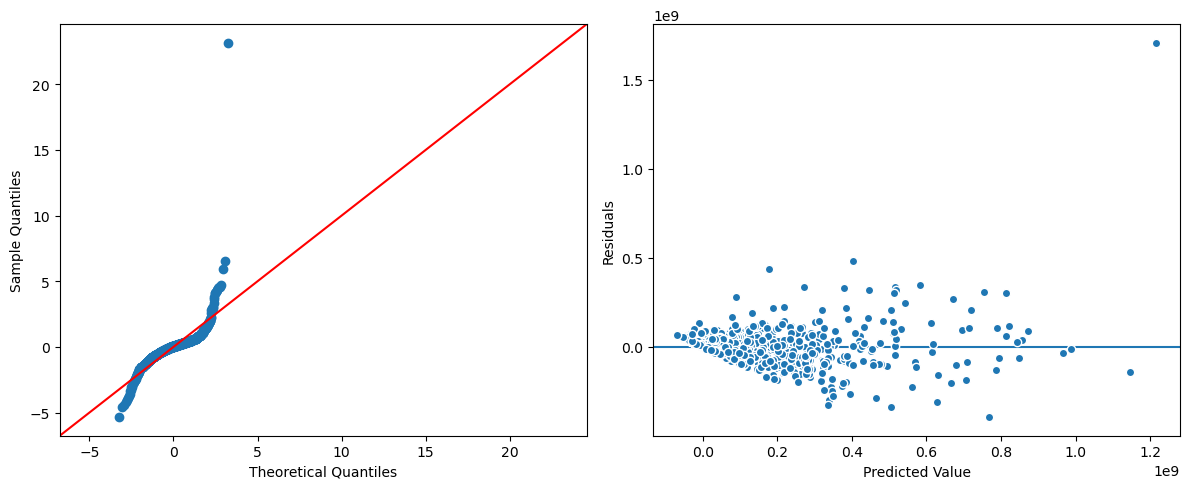

In [64]:
#Use function to make new x,y vars
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df)

## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

In [65]:
#Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

#Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.787
Testing R^2: 0.711


### Model 3: Remove Outliers

- Model 3 has a testing R2 of 0.739, and the residual plots look much better than before after removing outliers.

In [66]:
#Function to find outliers using z-scores
def find_outliers(data, verbose=True):
    outliers = np.abs(stats.zscore(data))>3
    
    if verbose:
        print(f"- {outliers.sum()} outliers found in {data.name} using Z-Scores.")
    return outliers

In [67]:
#Save a dictionary of the T/F outlier index for each feature in outleir_cols
outlier_cols = ['runtime','popularity','revenue']

outliers = {}
for col in outlier_cols:
    outliers_col = find_outliers(df[col])
    outliers[col] = outliers_col

- 35 outliers found in runtime using Z-Scores.
- 43 outliers found in popularity using Z-Scores.
- 53 outliers found in revenue using Z-Scores.


In [68]:
#Make new df_clean copy of df
df_clean = df.copy()

## loop through dictionary to remove outliers
for col, idx_outliers in outliers.items():
    df_clean = df_clean[~idx_outliers]
df_clean

/var/folders/5v/9gj8mfq115g1d799797d3z5m0000gp/T/ipykernel_3341/3277092395.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[~idx_outliers]


,adult,belongs_to_collection,budget,popularity,revenue,runtime,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
3,0.0,False,150000.0,19.202,14204632.0,99.0,8.100,2298.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
10,0.0,False,120000.0,2.709,14904.0,87.0,5.500,44.0,R,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,2002.0,4.0,26.0
12,0.0,True,45000000.0,34.762,224834564.0,84.0,6.800,4460.0,G,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,2000.0,6.0,23.0
15,0.0,False,8000000.0,9.602,105983.0,122.0,5.895,287.0,R,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2000.0,2.0,9.0
17,0.0,True,75000000.0,1.399,296339527.0,104.0,6.995,10470.0,PG-13,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,2000.0,7.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16598,0.0,False,2000000.0,0.763,1988431.0,98.0,4.000,11.0,NaN,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,2009.0,12.0,11.0
16618,0.0,False,300000.0,0.954,200000.0,122.0,4.000,12.0,NaN,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,2009.0,10.0,2.0
16659,0.0,True,600.0,2.920,3.0,81.0,2.083,18.0,NaN,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,2009.0,12.0,24.0
16666,0.0,True,125000.0,5.062,3470000.0,88.0,5.372,47.0,NaN,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,2009.0,6.0,18.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     132.1
Date:                Fri, 15 Sep 2023   Prob (F-statistic):               0.00
Time:                        08:13:55   Log-Likelihood:                -31881.
No. Observations:                1676   AIC:                         6.383e+04
Df Residuals:                    1641   BIC:                         6.402e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
certification_G          22.6162     39.433      0.574      0.566     -54.728      99.961
certification_MISSING     1.2762      0.046     27.468      0.000       1.185       1.367
certification_NC-17    3.681e+05    1.8e+05      2.040      0.042    1.41e+04    7.22e+05
certification_NR       1.818e+05   7.57e+04      2.402      0.016    3.33e+04     3.3e+05
certification_PG      -6.485e+05   1.35e+06     -0.479      0.632    -3.3e+06       2e+06
certification_PG-13    1.737e+04    798.093     21.768      0.000    1.58e+04    1.89e+04
certification_R        2.136e+05   3.91e+05      0.546      0.585   -5.53e+05     9.8e+05
adult                 -6.907e+04   3.24e+05     -0.213      0.831   -7.04e+05    5.66e+05
budget                -7.657e+04   1.29e+05     -0.594      0.553    -3.3e+05    1.76e+05
popularity            -4.339e+07   9.84e+07     -0.441      0.659   -2.36e+08     1.5e+08
runtime               -5.988e+07   9.82e+07     -0.610      0.542   -2.52e+08    1.33e+08
vote_average          -3.962e+07   1.01e+08     -0.393      0.694   -2.37e+08    1.58e+08
vote_count            -6.895e+07   9.82e+07     -0.702      0.483   -2.62e+08    1.24e+08
year                  -5.367e+07   9.83e+07     -0.546      0.585   -2.46e+08    1.39e+08
month                 -5.856e+07    9.8e+07     -0.598      0.550   -2.51e+08    1.34e+08
day                   -6.934e+07   9.81e+07     -0.707      0.480   -2.62e+08    1.23e+08
belongs_to_collection   2.77e+07   2.96e+06      9.361      0.000    2.19e+07    3.35e+07
Genre_Comedy           8.121e+06   2.92e+06      2.784      0.005     2.4e+06    1.38e+07
Genre_Music            1.006e+07   6.48e+06      1.552      0.121   -2.65e+06    2.28e+07
Genre_Romance          7.418e+06      3e+06      2.473      0.013    1.53e+06    1.33e+07
Genre_Science Fiction -2.426e+07   4.15e+06     -5.852      0.000   -3.24e+07   -1.61e+07
Genre_Drama           -1.804e+06   2.86e+06     -0.631      0.528   -7.41e+06     3.8e+06
Genre_Action          -1.007e+06   3.19e+06     -0.315      0.753   -7.27e+06    5.26e+06
Genre_Crime           -8.569e+06   3.37e+06     -2.540      0.011   -1.52e+07   -1.95e+06
Genre_Adventure       -1.567e+06   3.61e+06     -0.434      0.664   -8.65e+06    5.51e+06
Genre_Animation        3.205e+06   6.11e+06      0.525      0.600   -8.77e+06    1.52e+07
Genre_Fantasy         -1.222e+07   4.19e+06     -2.916      0.004   -2.04e+07      -4e+06
Genre_Horror          -1.728e+06   4.06e+06     -0.426      0.670   -9.69e+06    6.23e+06
Genre_Thriller         5.627e+06   3.06e+06      1.837      0.066    -3.8e+05    1.16e+07
Genre_History         -3.578e+06   6.02e+06     -0.595      0.552   -1.54e+07    8.22e+06
Genre_Family           3.479e+06   5.95e+06      0.585      0.559   -8.19e+06    1.51e+07
Genre_Mystery          

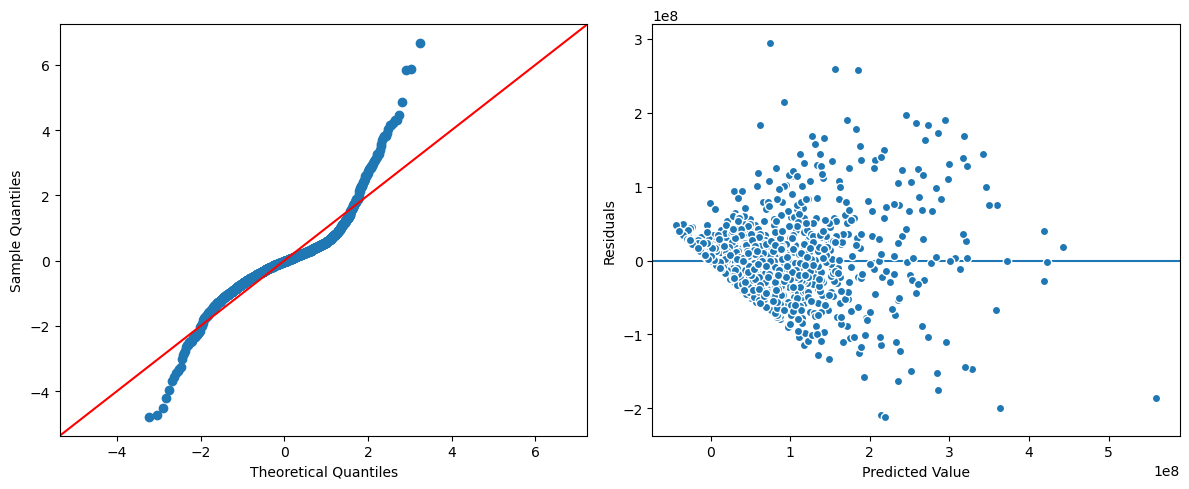

In [69]:
#Run model 3
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df_clean)
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

In [70]:
#Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

#Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.732
Testing R^2: 0.739


### Model 4: Remove Outliers Using IQR

- Model 4 has a testing R2 of 0.629.

<Axes: xlabel='revenue'>

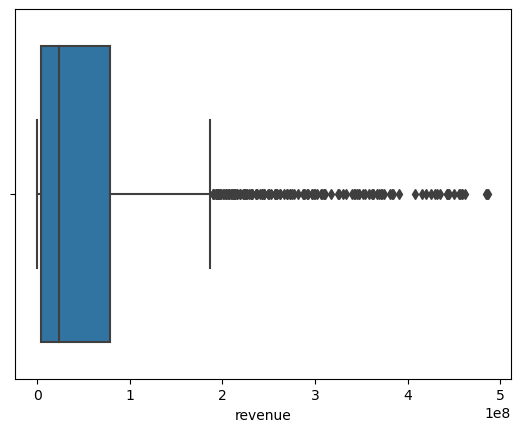

In [71]:
#Check revenue for outliers
sns.boxplot(x = y_train)

In [72]:
#Function to find outliers using IQR 
def find_outliers_IQR(data, verbose=True):
    q3 = np.quantile(data,.75)
    q1 = np.quantile(data,.25)

    IQR = q3 - q1
    upper_threshold = q3 + 1.5*IQR
    lower_threshold = q1 - 1.5*IQR
    
    outliers = (data<lower_threshold) | (data>upper_threshold)
    if verbose:
        print(f"- {outliers.sum()} outliers found in {data.name} using IQR.")
        
    return outliers

In [73]:
#Loop to remove outliers from same columns using new function
outlier_cols = ['runtime','popularity','revenue']

## Empty dict for both types of outliers
outliers_z = {}
outliers_iqr = {}

## Use both functions to see the comparison for # of outliers
for col in outlier_cols:
    outliers_col_z = find_outliers(df[col])
    outliers_z[col] = outliers_col_z
    
    outliers_col_iqr = find_outliers_IQR(df[col])
    outliers_iqr[col] = outliers_col_iqr
    print()

- 35 outliers found in runtime using Z-Scores.
- 88 outliers found in runtime using IQR.

- 43 outliers found in popularity using Z-Scores.
- 158 outliers found in popularity using IQR.

- 53 outliers found in revenue using Z-Scores.
- 212 outliers found in revenue using IQR.



In [74]:
#Remove_outliers using z-scores
df_clean_z = df.copy()
for col, idx_outliers in outliers_z.items():
    df_clean_z = df_clean_z[~idx_outliers]
df_clean_z

/var/folders/5v/9gj8mfq115g1d799797d3z5m0000gp/T/ipykernel_3341/3344008744.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean_z = df_clean_z[~idx_outliers]


,adult,belongs_to_collection,budget,popularity,revenue,runtime,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
3,0.0,False,150000.0,19.202,14204632.0,99.0,8.100,2298.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
10,0.0,False,120000.0,2.709,14904.0,87.0,5.500,44.0,R,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,2002.0,4.0,26.0
12,0.0,True,45000000.0,34.762,224834564.0,84.0,6.800,4460.0,G,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,2000.0,6.0,23.0
15,0.0,False,8000000.0,9.602,105983.0,122.0,5.895,287.0,R,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2000.0,2.0,9.0
17,0.0,True,75000000.0,1.399,296339527.0,104.0,6.995,10470.0,PG-13,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,2000.0,7.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16598,0.0,False,2000000.0,0.763,1988431.0,98.0,4.000,11.0,NaN,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,2009.0,12.0,11.0
16618,0.0,False,300000.0,0.954,200000.0,122.0,4.000,12.0,NaN,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,2009.0,10.0,2.0
16659,0.0,True,600.0,2.920,3.0,81.0,2.083,18.0,NaN,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,2009.0,12.0,24.0
16666,0.0,True,125000.0,5.062,3470000.0,88.0,5.372,47.0,NaN,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,2009.0,6.0,18.0


In [75]:
#Remove_outliers using IQR
df_clean_iqr = df.copy()
for col, idx_outliers in outliers_iqr.items():
    df_clean_iqr = df_clean_iqr[~idx_outliers]
df_clean_iqr

/var/folders/5v/9gj8mfq115g1d799797d3z5m0000gp/T/ipykernel_3341/1285379878.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean_iqr = df_clean_iqr[~idx_outliers]


,adult,belongs_to_collection,budget,popularity,revenue,runtime,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
3,0.0,False,150000.0,19.202,14204632.0,99.0,8.100,2298.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
10,0.0,False,120000.0,2.709,14904.0,87.0,5.500,44.0,R,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,2002.0,4.0,26.0
15,0.0,False,8000000.0,9.602,105983.0,122.0,5.895,287.0,R,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2000.0,2.0,9.0
18,0.0,False,75000000.0,12.885,36754634.0,94.0,6.572,984.0,PG,False,False,False,True,False,True,False,True,True,False,False,False,False,True,False,False,False,False,False,2000.0,6.0,16.0
21,0.0,False,24000000.0,10.429,36609995.0,115.0,6.568,389.0,PG,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16598,0.0,False,2000000.0,0.763,1988431.0,98.0,4.000,11.0,NaN,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,2009.0,12.0,11.0
16618,0.0,False,300000.0,0.954,200000.0,122.0,4.000,12.0,NaN,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,2009.0,10.0,2.0
16659,0.0,True,600.0,2.920,3.0,81.0,2.083,18.0,NaN,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,2009.0,12.0,24.0
16666,0.0,True,125000.0,5.062,3470000.0,88.0,5.372,47.0,NaN,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,2009.0,6.0,18.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     85.94
Date:                Fri, 15 Sep 2023   Prob (F-statistic):          1.38e-318
Time:                        08:17:46   Log-Likelihood:                -27586.
No. Observations:                1486   AIC:                         5.524e+04
Df Residuals:                    1451   BIC:                         5.543e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
certification_G       -1.235e+07   2.85e+07     -0.433      0.665   -6.83e+07    4.36e+07
certification_MISSING     0.7753      0.038     20.274      0.000       0.700       0.850
certification_NC-17    1.113e+06   1.74e+05      6.393      0.000    7.72e+05    1.45e+06
certification_NR       1.455e+05   5.71e+04      2.547      0.011    3.34e+04    2.58e+05
certification_PG       6.705e+04   9.27e+05      0.072      0.942   -1.75e+06    1.89e+06
certification_PG-13    1.291e+04    729.804     17.690      0.000    1.15e+04    1.43e+04
certification_R       -2.681e+05   2.64e+05     -1.015      0.310   -7.86e+05     2.5e+05
adult                 -3.408e+05   2.17e+05     -1.570      0.117   -7.67e+05     8.5e+04
budget                -5.951e+04   8.52e+04     -0.699      0.485   -2.27e+05    1.08e+05
popularity             8.944e+07   6.64e+07      1.347      0.178   -4.08e+07     2.2e+08
runtime                6.384e+07   6.64e+07      0.962      0.336   -6.64e+07    1.94e+08
vote_average           4.943e+07    6.7e+07      0.738      0.461    -8.2e+07    1.81e+08
vote_count              5.39e+07   6.64e+07      0.812      0.417   -7.63e+07    1.84e+08
year                   6.918e+07   6.64e+07      1.042      0.297    -6.1e+07    1.99e+08
month                  6.971e+07   6.62e+07      1.052      0.293   -6.02e+07       2e+08
day                    5.771e+07   6.62e+07      0.871      0.384   -7.22e+07    1.88e+08
belongs_to_collection  1.438e+07   2.07e+06      6.958      0.000    1.03e+07    1.84e+07
Genre_Comedy           4.565e+06      2e+06      2.288      0.022    6.51e+05    8.48e+06
Genre_Music            5.677e+06   4.06e+06      1.399      0.162   -2.28e+06    1.36e+07
Genre_Romance          5.668e+06   2.03e+06      2.798      0.005    1.69e+06    9.64e+06
Genre_Science Fiction  -1.41e+07   2.88e+06     -4.899      0.000   -1.97e+07   -8.45e+06
Genre_Drama             -2.4e+06   1.91e+06     -1.254      0.210   -6.15e+06    1.35e+06
Genre_Action           -1.72e+06   2.19e+06     -0.784      0.433   -6.02e+06    2.58e+06
Genre_Crime           -3.785e+06   2.29e+06     -1.653      0.099   -8.28e+06    7.07e+05
Genre_Adventure        -3.03e+06   2.52e+06     -1.200      0.230   -7.98e+06    1.92e+06
Genre_Animation        -7.21e+06   4.36e+06     -1.655      0.098   -1.58e+07    1.33e+06
Genre_Fantasy         -8.473e+06   2.84e+06     -2.979      0.003   -1.41e+07   -2.89e+06
Genre_Horror           1.461e+06   2.76e+06      0.528      0.597   -3.96e+06    6.88e+06
Genre_Thriller         1.439e+06   2.15e+06      0.668      0.504   -2.79e+06    5.66e+06
Genre_History          5.363e+06   4.26e+06      1.260      0.208   -2.99e+06    1.37e+07
Genre_Family           6.369e+06   3.96e+06      1.609      0.108    -1.4e+06    1.41e+07
Genre_Mystery          

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     85.94
Date:                Fri, 15 Sep 2023   Prob (F-statistic):          1.38e-318
Time:                        08:17:46   Log-Likelihood:                -27586.
No. Observations:                1486   AIC:                         5.524e+04
Df Residuals:                    1451   BIC:                         5.543e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
certification_G       -1.235e+07   2.85e+07     -0.433      0.665   -6.83e+07    4.36e+07
certification_MISSING     0.7753      0.038     20.274      0.000       0.700       0.850
certification_NC-17    1.113e+06   1.74e+05      6.393      0.000    7.72e+05    1.45e+06
certification_NR       1.455e+05   5.71e+04      2.547      0.011    3.34e+04    2.58e+05
certification_PG       6.705e+04   9.27e+05      0.072      0.942   -1.75e+06    1.89e+06
certification_PG-13    1.291e+04    729.804     17.690      0.000    1.15e+04    1.43e+04
certification_R       -2.681e+05   2.64e+05     -1.015      0.310   -7.86e+05     2.5e+05
adult                 -3.408e+05   2.17e+05     -1.570      0.117   -7.67e+05     8.5e+04
budget                -5.951e+04   8.52e+04     -0.699      0.485   -2.27e+05    1.08e+05
popularity             8.944e+07   6.64e+07      1.347      0.178   -4.08e+07     2.2e+08
runtime                6.384e+07   6.64e+07      0.962      0.336   -6.64e+07    1.94e+08
vote_average           4.943e+07    6.7e+07      0.738      0.461    -8.2e+07    1.81e+08
vote_count              5.39e+07   6.64e+07      0.812      0.417   -7.63e+07    1.84e+08
year                   6.918e+07   6.64e+07      1.042      0.297    -6.1e+07    1.99e+08
month                  6.971e+07   6.62e+07      1.052      0.293   -6.02e+07       2e+08
day                    5.771e+07   6.62e+07      0.871      0.384   -7.22e+07    1.88e+08
belongs_to_collection  1.438e+07   2.07e+06      6.958      0.000    1.03e+07    1.84e+07
Genre_Comedy           4.565e+06      2e+06      2.288      0.022    6.51e+05    8.48e+06
Genre_Music            5.677e+06   4.06e+06      1.399      0.162   -2.28e+06    1.36e+07
Genre_Romance          5.668e+06   2.03e+06      2.798      0.005    1.69e+06    9.64e+06
Genre_Science Fiction  -1.41e+07   2.88e+06     -4.899      0.000   -1.97e+07   -8.45e+06
Genre_Drama             -2.4e+06   1.91e+06     -1.254      0.210   -6.15e+06    1.35e+06
Genre_Action           -1.72e+06   2.19e+06     -0.784      0.433   -6.02e+06    2.58e+06
Genre_Crime           -3.785e+06   2.29e+06     -1.653      0.099   -8.28e+06    7.07e+05
Genre_Adventure        -3.03e+06   2.52e+06     -1.200      0.230   -7.98e+06    1.92e+06
Genre_Animation        -7.21e+06   4.36e+06     -1.655      0.098   -1.58e+07    1.33e+06
Genre_Fantasy         -8.473e+06   2.84e+06     -2.979      0.003   -1.41e+07   -2.89e+06
Genre_Horror           1.461e+06   2.76e+06      0.528      0.597   -3.96e+06    6.88e+06
Genre_Thriller         1.439e+06   2.15e+06      0.668      0.504   -2.79e+06    5.66e+06
Genre_History          5.363e+06   4.26e+06      1.260      0.208   -2.99e+06    1.37e+07
Genre_Family           6.369e+06   3.96e+06      1.609      0.108    -1.4e+06    1.41e+07
Genre_Mystery          

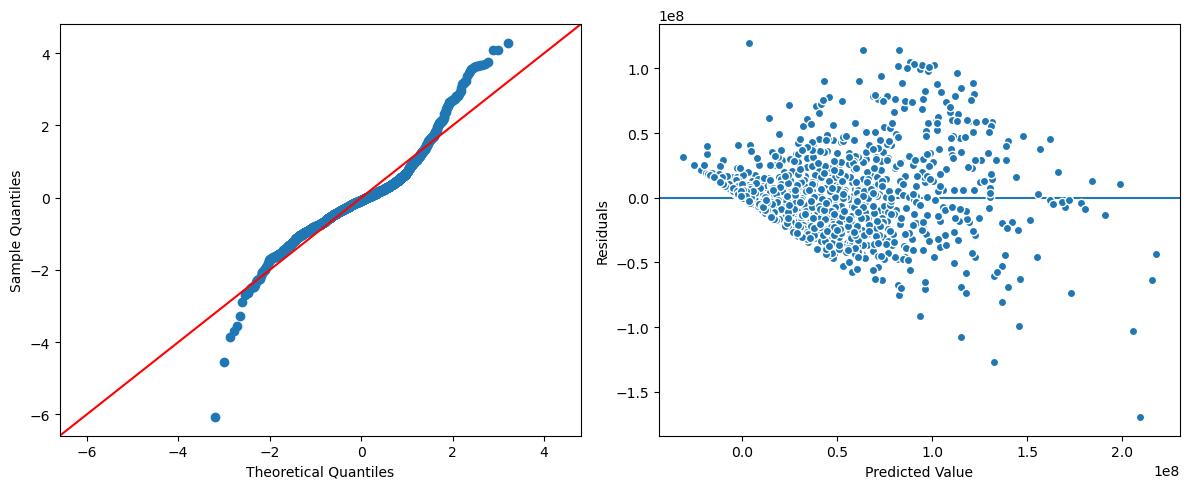

In [76]:
#Model 4 with outliers removed

X_train_df, y_train, X_test_df, y_test = get_train_test_split(df_clean_iqr)
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
display(result.summary())
evaluate_ols(result,X_train_df,y_train)

In [77]:
#Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

#Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.668
Testing R^2: 0.629


### Model 5: Remove Features using p-values

- Model 5 has a testing R2 of 0.151.

In [78]:
#Get pvalues from model result
pvals = result.pvalues 
pvals

certification_G          6.652003e-01
certification_MISSING    1.159541e-80
certification_NC-17      2.184959e-10
certification_NR         1.097375e-02
certification_PG         9.423681e-01
certification_PG-13      1.450079e-63
certification_R          3.101319e-01
adult                    1.166264e-01
budget                   4.848162e-01
popularity               1.781974e-01
runtime                  3.363367e-01
vote_average             4.606439e-01
vote_count               4.168457e-01
year                     2.973728e-01
month                    2.927933e-01
day                      3.836336e-01
belongs_to_collection    5.220598e-12
Genre_Comedy             2.228030e-02
Genre_Music              1.620607e-01
Genre_Romance            5.202154e-03
Genre_Science Fiction    1.072001e-06
Genre_Drama              2.099362e-01
Genre_Action             4.333363e-01
Genre_Crime              9.857115e-02
Genre_Adventure          2.302175e-01
Genre_Animation          9.807835e-02
Genre_Fantas

In [79]:
#Check for p-values that are >.05
pvals[ pvals>.05]

certification_G      0.665200
certification_PG     0.942368
certification_R      0.310132
adult                0.116626
budget               0.484816
popularity           0.178197
runtime              0.336337
vote_average         0.460644
vote_count           0.416846
year                 0.297373
month                0.292793
day                  0.383634
Genre_Music          0.162061
Genre_Drama          0.209936
Genre_Action         0.433336
Genre_Crime          0.098571
Genre_Adventure      0.230217
Genre_Animation      0.098078
Genre_Horror         0.597282
Genre_Thriller       0.504381
Genre_History        0.207814
Genre_Family         0.107923
Genre_Mystery        0.419907
Genre_Western        0.445349
Genre_Documentary    0.563409
const                0.327999
dtype: float64

In [80]:
## Get list of ALL genre columns to see how many are sig
genre_cols = [c for c in df_clean.columns if c.startswith("Genre")]
genre_cols

['Genre_Comedy',
 'Genre_Music',
 'Genre_Romance',
 'Genre_Science Fiction',
 'Genre_Drama',
 'Genre_Action',
 'Genre_Crime',
 'Genre_Adventure',
 'Genre_Animation',
 'Genre_Fantasy',
 'Genre_Horror',
 'Genre_Thriller',
 'Genre_History',
 'Genre_Family',
 'Genre_Mystery',
 'Genre_Western',
 'Genre_War',
 'Genre_TV Movie',
 'Genre_Documentary']

In [81]:
## save just genre pvalues
genre_pvals = pvals[genre_cols]
## calc what % are insig?
genre_pvals.sum()/len(genre_pvals)

0.21769192844722793

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     14.38
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           1.47e-55
Time:                        08:22:01   Log-Likelihood:                -28277.
No. Observations:                1486   AIC:                         5.661e+04
Df Residuals:                    1459   BIC:                         5.675e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
certification_G         2.99e+07   8.82e+06      3.388      0.001    1.26e+07    4.72e+07
certification_MISSING -1.573e+07   4.07e+06     -3.868      0.000   -2.37e+07   -7.75e+06
certification_NC-17   -9.593e+06   1.98e+07     -0.485      0.627   -4.84e+07    2.92e+07
certification_NR      -1.907e+07   6.71e+06     -2.840      0.005   -3.22e+07    -5.9e+06
certification_PG       1.704e+07   5.41e+06      3.151      0.002    6.43e+06    2.77e+07
certification_PG-13    2.598e+07   3.99e+06      6.508      0.000    1.81e+07    3.38e+07
certification_R        2.619e+05   3.91e+06      0.067      0.947    -7.4e+06    7.93e+06
belongs_to_collection  2.092e+07   3.19e+06      6.565      0.000    1.47e+07    2.72e+07
Genre_Comedy          -2.701e+06   3.07e+06     -0.881      0.379   -8.72e+06    3.31e+06
Genre_Music             6.53e+06   7.08e+06      0.922      0.357   -7.36e+06    2.04e+07
Genre_Romance          8.774e+06   3.17e+06      2.768      0.006    2.56e+06     1.5e+07
Genre_Science Fiction  2.308e+05   4.56e+06      0.051      0.960   -8.72e+06    9.18e+06
Genre_Drama           -1.108e+07   2.89e+06     -3.831      0.000   -1.68e+07   -5.41e+06
Genre_Action           1.922e+06   3.43e+06      0.560      0.575   -4.81e+06    8.65e+06
Genre_Crime            3.345e+06   3.58e+06      0.934      0.350   -3.68e+06    1.04e+07
Genre_Adventure        8.008e+06   3.91e+06      2.050      0.041    3.47e+05    1.57e+07
Genre_Animation       -1.229e+07   6.84e+06     -1.798      0.072   -2.57e+07    1.12e+06
Genre_Fantasy          8.783e+06    4.5e+06      1.953      0.051   -3.79e+04    1.76e+07
Genre_Horror          -3.366e+06   4.25e+06     -0.792      0.429   -1.17e+07    4.98e+06
Genre_Thriller          8.61e+06   3.34e+06      2.578      0.010    2.06e+06    1.52e+07
Genre_History          7.145e+06   6.63e+06      1.078      0.281   -5.86e+06    2.01e+07
Genre_Family           1.202e+07   6.19e+06      1.940      0.053   -1.31e+05    2.42e+07
Genre_Mystery          -1.92e+05   4.11e+06     -0.047      0.963   -8.26e+06    7.88e+06
Genre_Western         -1.558e+07   1.18e+07     -1.317      0.188   -3.88e+07    7.63e+06
Genre_War              1.483e+07   7.02e+06      2.112      0.035    1.06e+06    2.86e+07
Genre_TV Movie        -2.846e+07   4.55e+07     -0.626      0.531   -1.18e+08    6.07e+07
Genre_Documentary     -1.314e+07   2.61e+07     -0.503      0.615   -6.43e+07    3.81e+07
const                  2.879e+07   4.56e+06      6.318      0.000    1.98e+07    3.77e+07
==============================================================================
Omnibus:                      357.020   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              714.357
Skew:                           1.407   Prob(JB):       

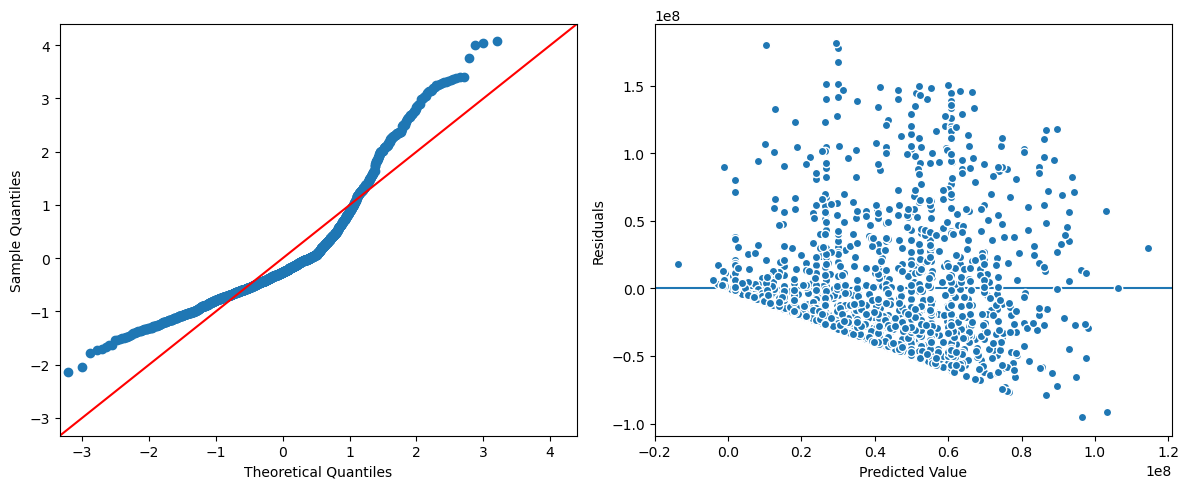

In [82]:
## Make x,y vars, but drop features with bad pvalues
df_clean_iqr = df_clean_iqr.drop(columns=['adult','budget', 'popularity', 
                                          'runtime', 'vote_count', 'vote_average', 
                                          'year', 'month', 'day'])
X_train_df, y_train, X_test_df, y_test = \
                                get_train_test_split(df_clean_iqr,)
## MAKE AND EVALUATE OLS
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

In [83]:
#Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

#Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.204
Testing R^2: 0.151


### Model 6: Addressing Multicollinearity

- Model 6 has a testing R2 of 0.168.

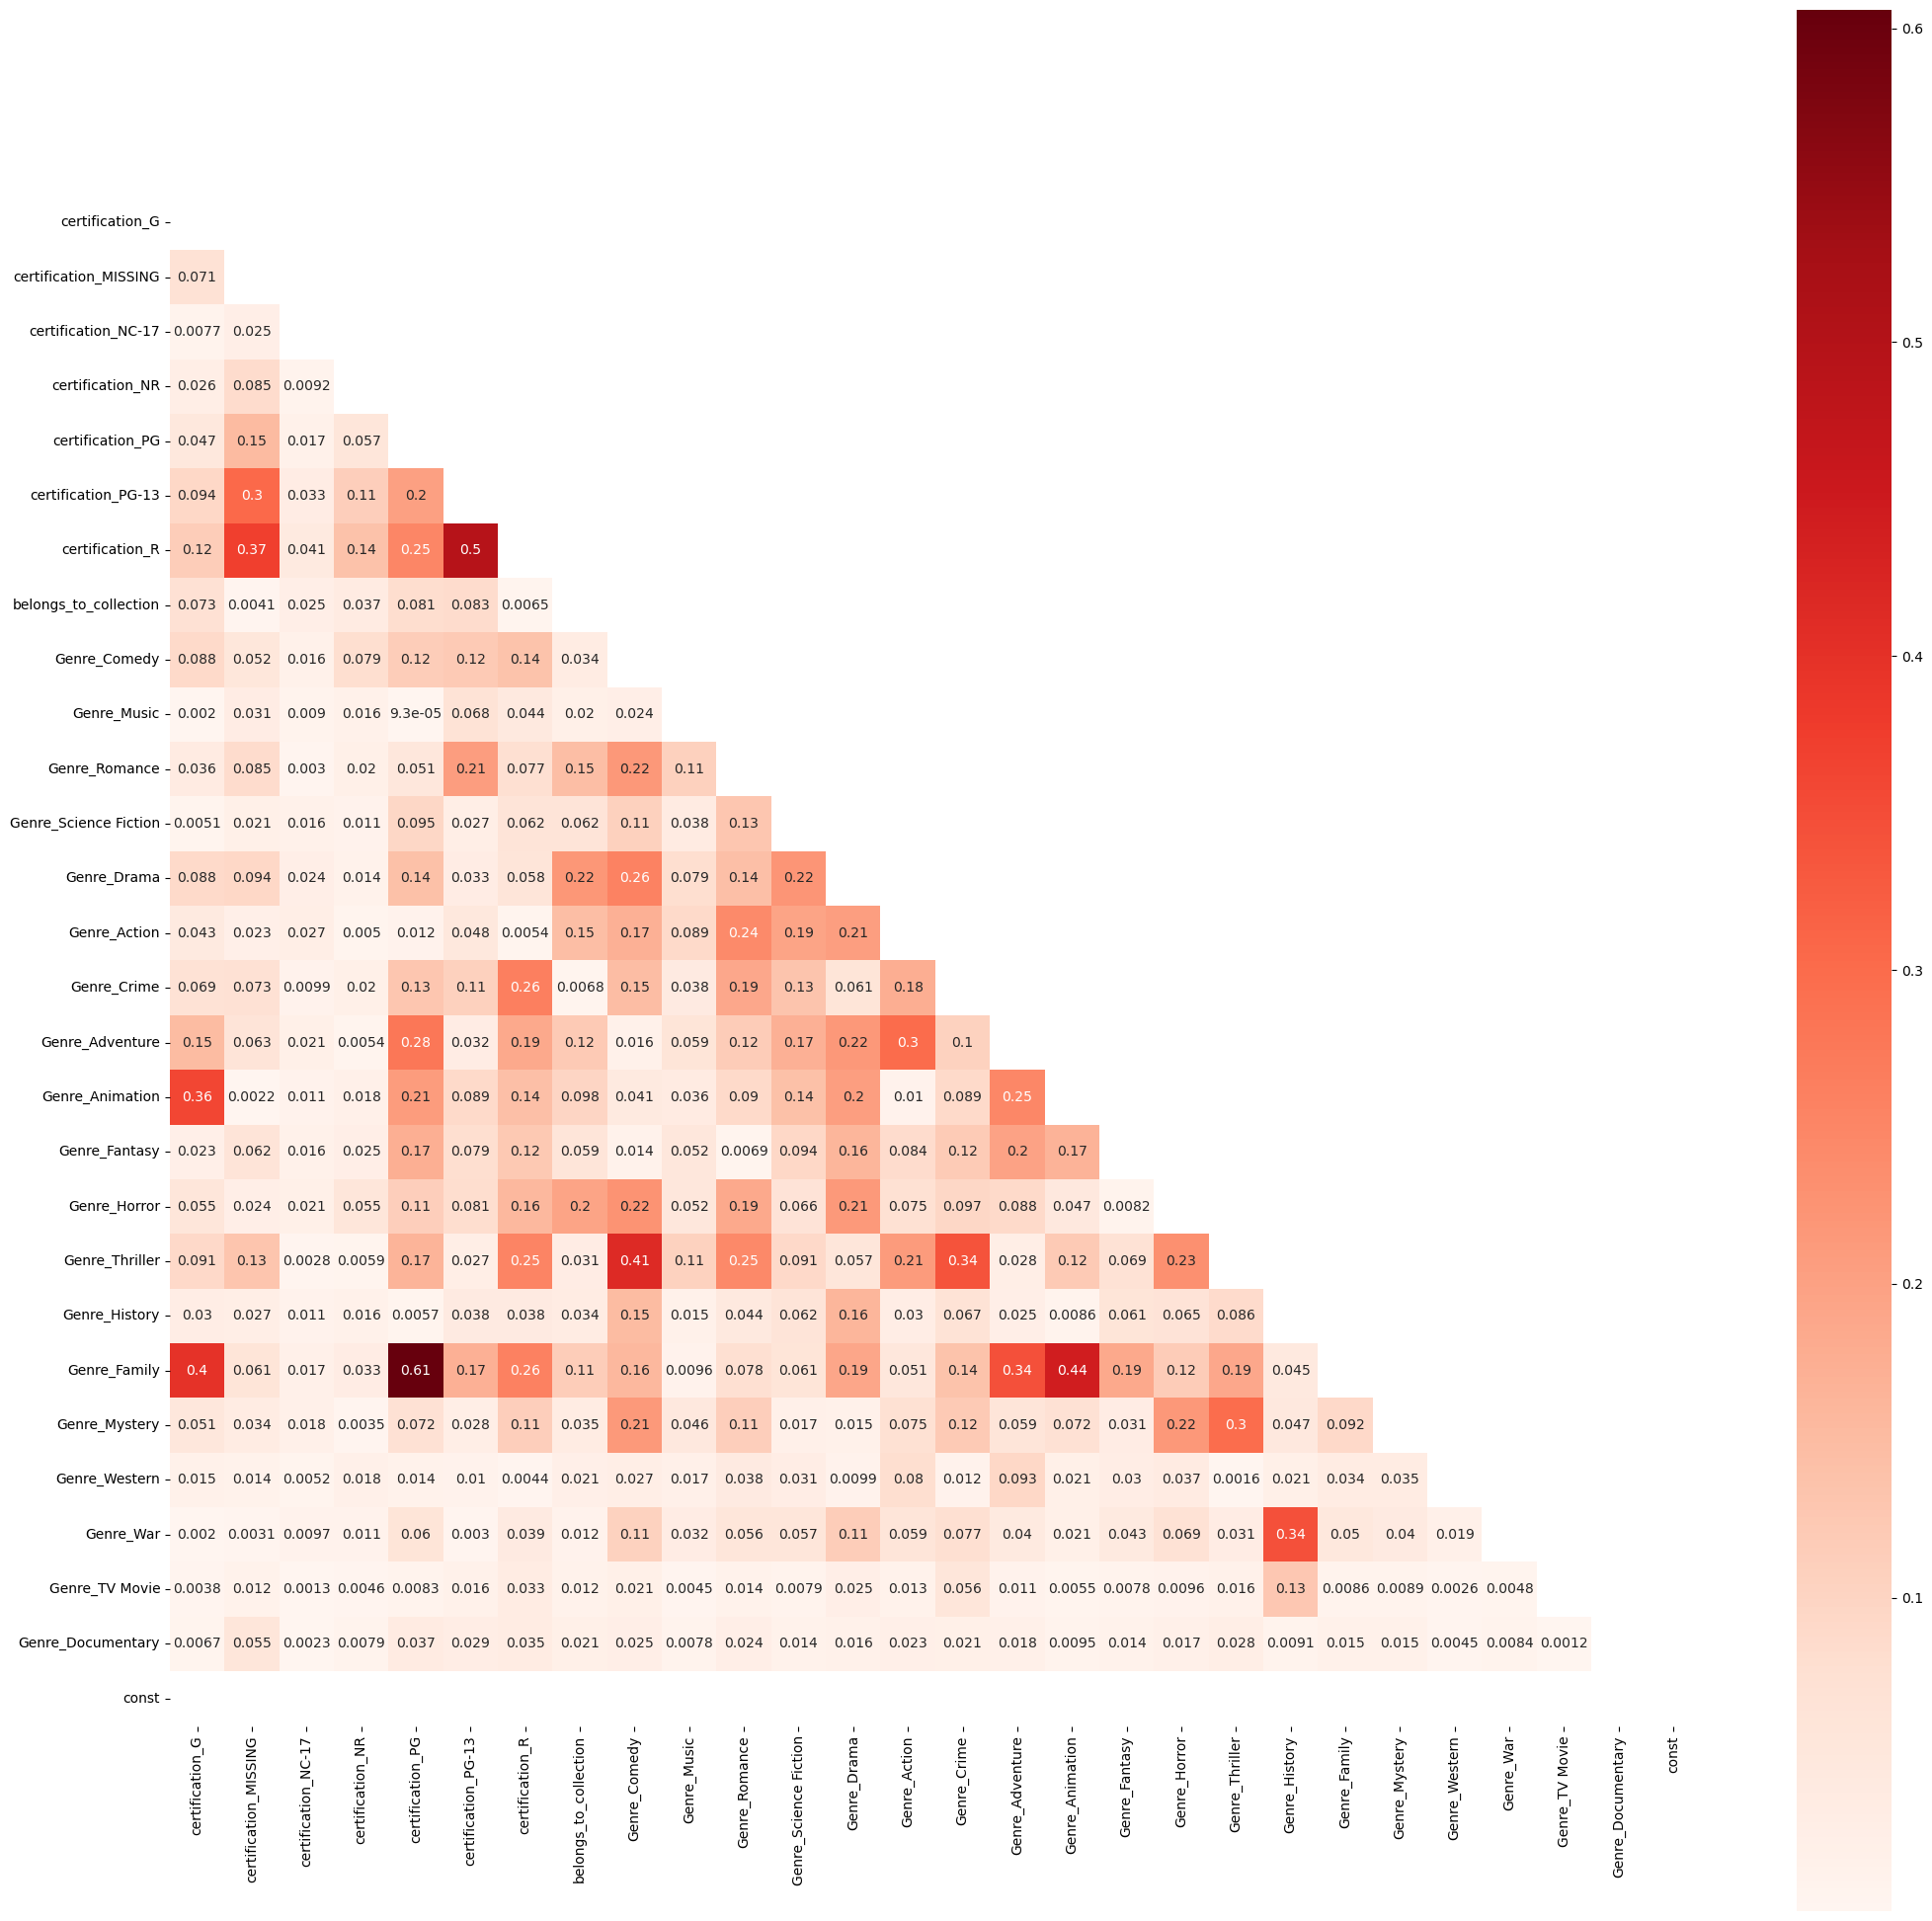

In [84]:
## Calculating the mask to hide the upper-right of the triangle
plt.figure(figsize=(25,25))
corr = X_train_df.corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
# separate just x-data and subtract mean
features = X_train_df -  X_train_df.mean()

features

,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,const
15040,-0.021534,0.813594,-0.002692,-0.030283,-0.092867,-0.287349,-0.378869,-0.184388,-0.396366,-0.028937,-0.22611,-0.084118,0.484522,0.789367,-0.176985,-0.144011,-0.042396,-0.082773,-0.121131,0.72611,-0.039704,-0.099596,-0.10498,-0.010094,-0.033647,-0.000673,-0.002019,0.0
7599,-0.021534,0.813594,-0.002692,-0.030283,-0.092867,-0.287349,-0.378869,0.815612,0.603634,-0.028937,-0.22611,-0.084118,-0.515478,-0.210633,0.823015,-0.144011,0.957604,-0.082773,-0.121131,-0.27389,-0.039704,0.900404,-0.10498,-0.010094,-0.033647,-0.000673,-0.002019,0.0
4398,-0.021534,-0.186406,-0.002692,-0.030283,-0.092867,0.712651,-0.378869,-0.184388,0.603634,-0.028937,-0.22611,-0.084118,-0.515478,-0.210633,-0.176985,-0.144011,-0.042396,-0.082773,-0.121131,-0.27389,-0.039704,-0.099596,-0.10498,-0.010094,-0.033647,-0.000673,-0.002019,0.0
6749,0.978466,-0.186406,-0.002692,-0.030283,-0.092867,-0.287349,-0.378869,-0.184388,0.603634,-0.028937,-0.22611,-0.084118,-0.515478,-0.210633,-0.176985,0.855989,0.957604,-0.082773,-0.121131,-0.27389,-0.039704,0.900404,-0.10498,-0.010094,-0.033647,-0.000673,-0.002019,0.0
12989,-0.021534,-0.186406,-0.002692,-0.030283,-0.092867,-0.287349,0.621131,-0.184388,0.603634,-0.028937,-0.22611,-0.084118,0.484522,-0.210633,-0.176985,-0.144011,-0.042396,-0.082773,-0.121131,-0.27389,-0.039704,-0.099596,-0.10498,-0.010094,-0.033647,-0.000673,-0.002019,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10804,-0.021534,-0.186406,-0.002692,-0.030283,-0.092867,-0.287349,0.621131,-0.184388,-0.396366,-0.028937,-0.22611,-0.084118,0.484522,-0.210633,-0.176985,0.855989,-0.042396,-0.082773,-0.121131,-0.27389,-0.039704,-0.099596,-0.10498,-0.010094,-0.033647,-0.000673,-0.002019,0.0
5626,-0.021534,-0.186406,-0.002692,-0.030283,-0.092867,-0.287349,0.621131,-0.184388,-0.396366,-0.028937,-0.22611,-0.084118,-0.515478,-0.210633,-0.176985,-0.144011,-0.042396,-0.082773,0.878869,-0.27389,-0.039704,-0.099596,0.89502,-0.010094,-0.033647,-0.000673,-0.002019,0.0
9401,-0.021534,0.813594,-0.002692,-0.030283,-0.092867,-0.287349,-0.378869,-0.184388,-0.396366,-0.028937,0.77389,-0.084118,0.484522,-0.210633,-0.176985,-0.144011,-0.042396,-0.082773,-0.121131,-0.27389,-0.039704,-0.099596,-0.10498,-0.010094,-0.033647,-0.000673,-0.002019,0.0
14664,-0.021534,0.813594,-0.002692,-0.030283,-0.092867,-0.287349,-0.378869,-0.184388,-0.396366,-0.028937,-0.22611,-0.084118,0.484522,-0.210633,-0.176985,-0.144011,-0.042396,-0.082773,-0.121131,-0.27389,-0.039704,-0.099596,-0.10498,-0.010094,-0.033647,-0.000673,-0.002019,0.0


In [86]:
# create a list of VIF scores for each feature in features.
vif_scores = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

# create a new dataframe to hold the VIF scores 
VIF = pd.Series(vif_scores, index=features.columns)
VIF

/Users/krisbarber/anaconda3/envs/dojo-env/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/krisbarber/anaconda3/envs/dojo-env/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


certification_G               inf
certification_MISSING         inf
certification_NC-17           inf
certification_NR              inf
certification_PG              inf
certification_PG-13           inf
certification_R               inf
belongs_to_collection    1.127423
Genre_Comedy             1.662044
Genre_Music              1.040253
Genre_Romance            1.298999
Genre_Science Fiction    1.184769
Genre_Drama              1.543479
Genre_Action             1.445540
Genre_Crime              1.379345
Genre_Adventure          1.389089
Genre_Animation          1.401354
Genre_Fantasy            1.133950
Genre_Horror             1.421921
Genre_Thriller           1.637935
Genre_History            1.237491
Genre_Family             2.541913
Genre_Mystery            1.174016
Genre_Western            1.033265
Genre_War                1.184332
Genre_TV Movie           1.026307
Genre_Documentary        1.013699
const                         NaN
dtype: float64

In [87]:
## Sort VIF for inspect
VIF.sort_values()

Genre_Documentary        1.013699
Genre_TV Movie           1.026307
Genre_Western            1.033265
Genre_Music              1.040253
belongs_to_collection    1.127423
Genre_Fantasy            1.133950
Genre_Mystery            1.174016
Genre_War                1.184332
Genre_Science Fiction    1.184769
Genre_History            1.237491
Genre_Romance            1.298999
Genre_Crime              1.379345
Genre_Adventure          1.389089
Genre_Animation          1.401354
Genre_Horror             1.421921
Genre_Action             1.445540
Genre_Drama              1.543479
Genre_Thriller           1.637935
Genre_Comedy             1.662044
Genre_Family             2.541913
certification_R               inf
certification_PG-13           inf
certification_PG              inf
certification_NR              inf
certification_NC-17           inf
certification_MISSING         inf
certification_G               inf
const                         NaN
dtype: float64

In [88]:
## Set float format to view vals not in scientfic notation
pd.set_option('display.float_format',lambda x: f'{x:.2f}')

In [89]:
## remove infinite values from VIF and sort
VIF = VIF[VIF!=np.inf].sort_values()
VIF

Genre_Documentary       1.01
Genre_TV Movie          1.03
Genre_Western           1.03
Genre_Music             1.04
belongs_to_collection   1.13
Genre_Fantasy           1.13
Genre_Mystery           1.17
Genre_War               1.18
Genre_Science Fiction   1.18
Genre_History           1.24
Genre_Romance           1.30
Genre_Crime             1.38
Genre_Adventure         1.39
Genre_Animation         1.40
Genre_Horror            1.42
Genre_Action            1.45
Genre_Drama             1.54
Genre_Thriller          1.64
Genre_Comedy            1.66
Genre_Family            2.54
const                    NaN
dtype: float64

In [90]:
## filter for VIF that are > 5
VIF[VIF>5]

Series([], dtype: float64)

In [91]:
high_vif = VIF[VIF>5].index
high_vif

Index([], dtype='object')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     13.79
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           4.54e-53
Time:                        08:25:28   Log-Likelihood:                -28228.
No. Observations:                1486   AIC:                         5.651e+04
Df Residuals:                    1459   BIC:                         5.665e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
certification_G        3.078e+07   8.44e+06      3.646      0.000    1.42e+07    4.73e+07
certification_MISSING -1.422e+07   3.95e+06     -3.599      0.000    -2.2e+07   -6.47e+06
certification_NC-17   -8.161e+06   1.91e+07     -0.427      0.670   -4.57e+07    2.94e+07
certification_NR      -1.364e+07   6.48e+06     -2.106      0.035   -2.63e+07   -9.35e+05
certification_PG       1.147e+07   5.08e+06      2.255      0.024    1.49e+06    2.14e+07
certification_PG-13    2.438e+07   3.84e+06      6.348      0.000    1.68e+07    3.19e+07
certification_R       -7.316e+05   3.76e+06     -0.195      0.846   -8.11e+06    6.64e+06
belongs_to_collection  2.005e+07   3.13e+06      6.414      0.000    1.39e+07    2.62e+07
Genre_Comedy          -1.866e+06   2.96e+06     -0.630      0.529   -7.67e+06    3.94e+06
Genre_Music            1.089e+07   6.45e+06      1.689      0.091   -1.76e+06    2.35e+07
Genre_Romance          2.709e+06   3.03e+06      0.893      0.372   -3.24e+06    8.66e+06
Genre_Science Fiction -8.045e+05   4.41e+06     -0.182      0.855   -9.46e+06    7.85e+06
Genre_Drama           -1.219e+07   2.79e+06     -4.372      0.000   -1.77e+07   -6.72e+06
Genre_Action           2.281e+06   3.35e+06      0.681      0.496   -4.29e+06    8.85e+06
Genre_Crime            2.659e+06    3.4e+06      0.781      0.435   -4.02e+06    9.33e+06
Genre_Adventure         6.59e+06    3.9e+06      1.689      0.091   -1.06e+06    1.42e+07
Genre_Animation       -1.249e+07   6.54e+06     -1.911      0.056   -2.53e+07    3.34e+05
Genre_Fantasy          4.361e+06   4.34e+06      1.005      0.315   -4.15e+06    1.29e+07
Genre_Horror          -3.357e+06   4.07e+06     -0.826      0.409   -1.13e+07    4.62e+06
Genre_Thriller          7.76e+06   3.22e+06      2.411      0.016    1.45e+06    1.41e+07
Genre_History          4.512e+06   6.24e+06      0.723      0.470   -7.74e+06    1.68e+07
Genre_Family            1.69e+07      6e+06      2.819      0.005    5.14e+06    2.87e+07
Genre_Mystery           1.54e+06   3.98e+06      0.387      0.699   -6.27e+06    9.35e+06
Genre_Western          -7.41e+06   1.05e+07     -0.706      0.480    -2.8e+07    1.32e+07
Genre_War              1.727e+07   6.73e+06      2.565      0.010    4.06e+06    3.05e+07
Genre_TV Movie        -2.412e+07    4.4e+07     -0.549      0.583    -1.1e+08    6.21e+07
Genre_Documentary     -1.104e+07   2.19e+07     -0.504      0.614    -5.4e+07    3.19e+07
const                  2.987e+07   4.37e+06      6.837      0.000    2.13e+07    3.84e+07
==============================================================================
Omnibus:                      368.507   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              755.365
Skew:                           1.437   Prob(JB):       

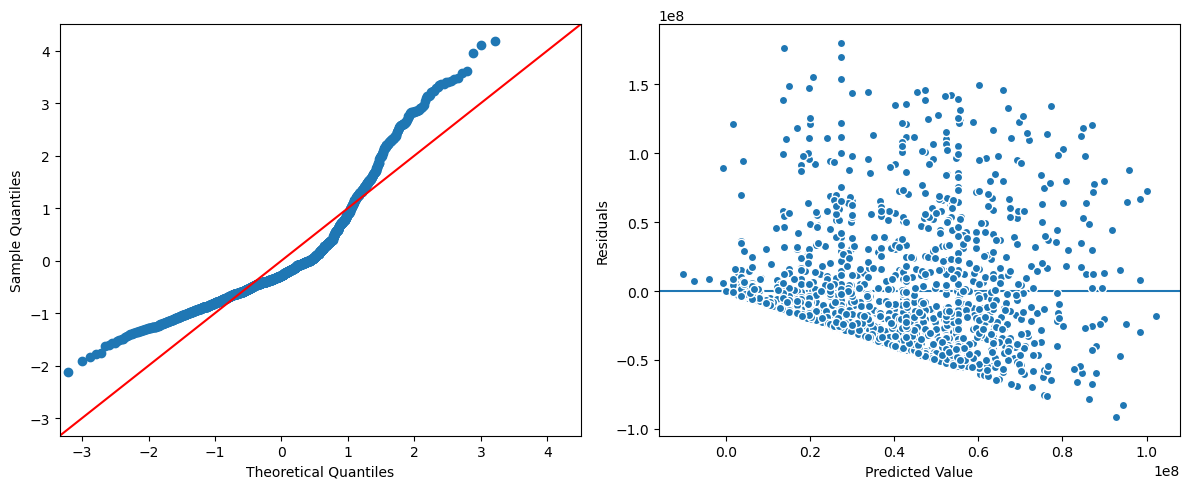

In [92]:
## make new df_final copy of prev df
df_final = df_clean_iqr.drop(columns =high_vif).copy()
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df_final)
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

In [93]:
#Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

#Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.197
Testing R^2: 0.168


### Final Model: Random Forest Regressor

- The random forest model has a testing R2 of 0.788.

In [94]:
from sklearn.ensemble import RandomForestRegressor
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df)

reg = RandomForestRegressor(verbose=1,random_state=42)
reg.fit(X_train_df, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


RandomForestRegressor(random_state=42, verbose=1)

In [95]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = reg.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = reg.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.964
Testing R^2: 0.788


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


## Conclusions:

- After testing 6 different models, the best ones were models 3 and 4. These models still had decent R2 scores and residual plots. In the final 2 models, the results were not really improving. I also compared a random forest regressor, which was slightly overfit. Overall, I believe that we could trust the outputs of models 3 and 4.

### 3 Recommendations

- Using coefficients from model 4, I can offer these recommendations: 

1. Pay attention to runtime. Movies that are too long or too short may decrease revenue.
2. Choose genres that appeal to more people. In this model, musical movies have the highest positive impact on revenue, but so do romance and family movies. Movies that appeal to wide audiences may generate more revenue.
3. Choose ratings that also appeal to more people. Ratings of PG may generate more revenue.